In [ ]:

import warnings
warnings.filterwarnings('ignore')
# version 2.03

# Predicción de Series Temporales

## Bibliografía
<div class="hr2"></div>
- Hyndman, R. J., A. B. Koehler, J. K. Ord and R. D. Snyder (2008).
Forecasting with exponential smoothing: the state space approach.
Berlin: Springer-Verlag.

- Hydman, Rob y George Athanasopoulos (2015). “Forecasting: principles and
practice”. Otexts.
[*https://www.otexts.org/fpp*](https://www.otexts.org/fpp)

- Gardner Jr, E. S. (1985). Exponential smoothing: The state of the art.
Journal of Forecasting 4(1), 1–28.

- Gardner Jr, E. S. (2006). Exponential smoothing: The state of the
art—Part II. International Journal of Forecasting 22(4), 637–666.



<div class="hr2"></div>

Una **serie temporal** es una sucesión de observaciones de una variable
tomadas en varios instantes de tiempo:

-   Interesa estudiar los cambios en esa variable con respeto al tiempo.

-   Predecir sus valores futuros.

**Problema:**

Estas observaciones provienen de una distribución que puede ser
diferente en cada instante del tiempo.







**Estacionariedad:**

-   Una serie **es estacionaria** si la media y la variabilidad se
    mantienen constantes a lo largo del tiempo.

-   Una serie **es no estacionaria** si la media y/o la variabilidad
    cambian a lo largo del tiempo.:

    -   Series no estacionarias pueden mostrar cambios de varianza.

    -   Series no estacionarias pueden mostrar una tendencia, es decir
        que la media crece o baja a lo largo del tiempo.

    -   Además, pueden presentar efectos estacionales, es decir que el
        comportamiento de la serie es parecido en ciertos tiempos
        periódicos en el tiempo.





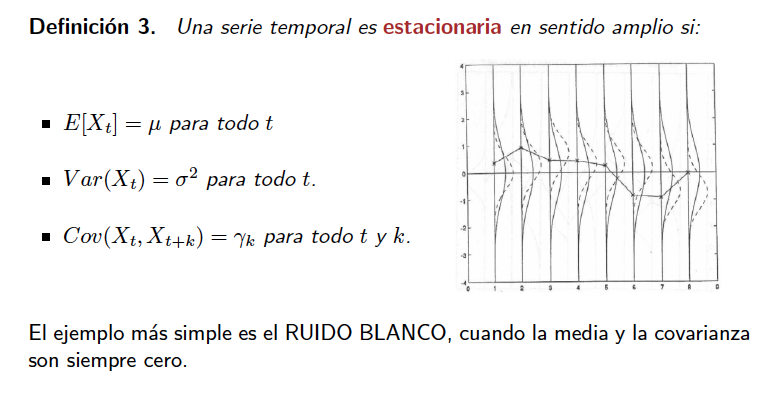


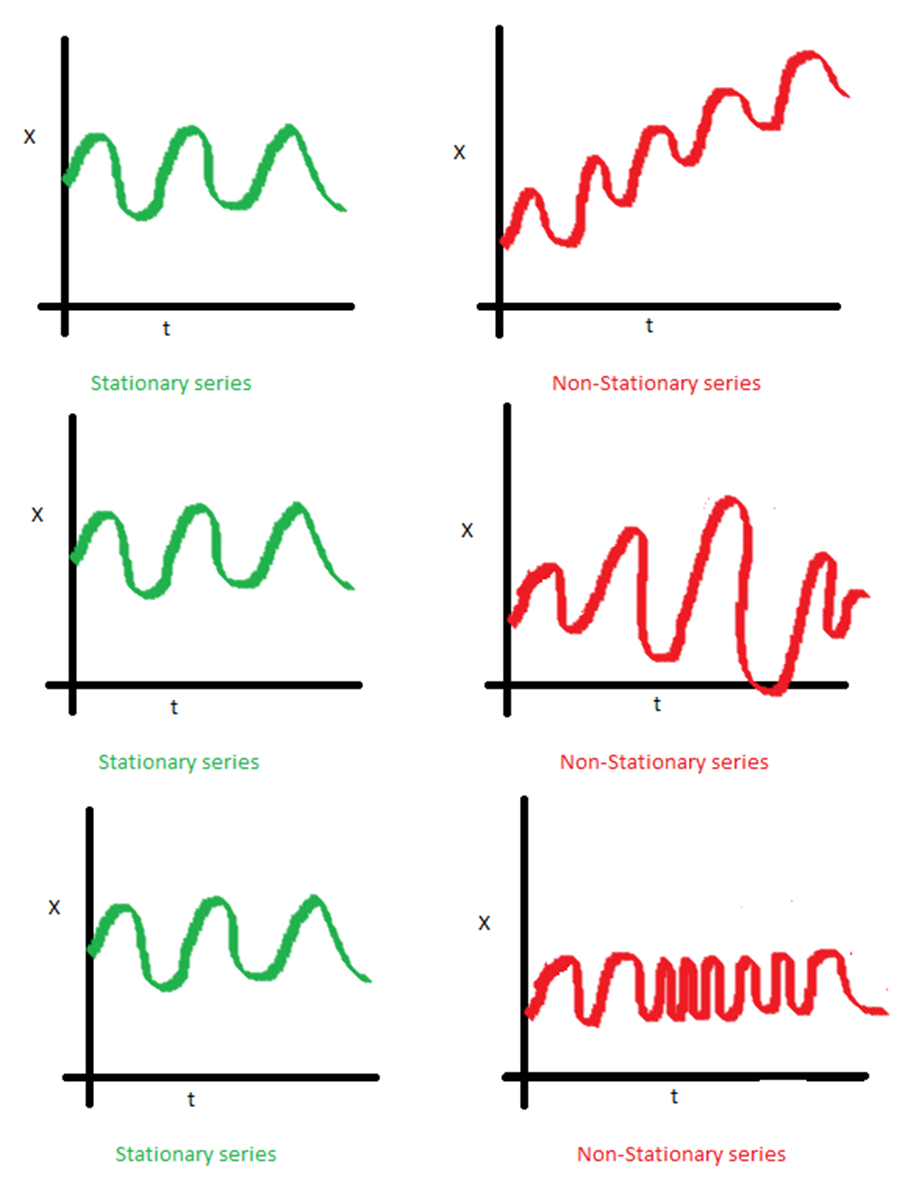

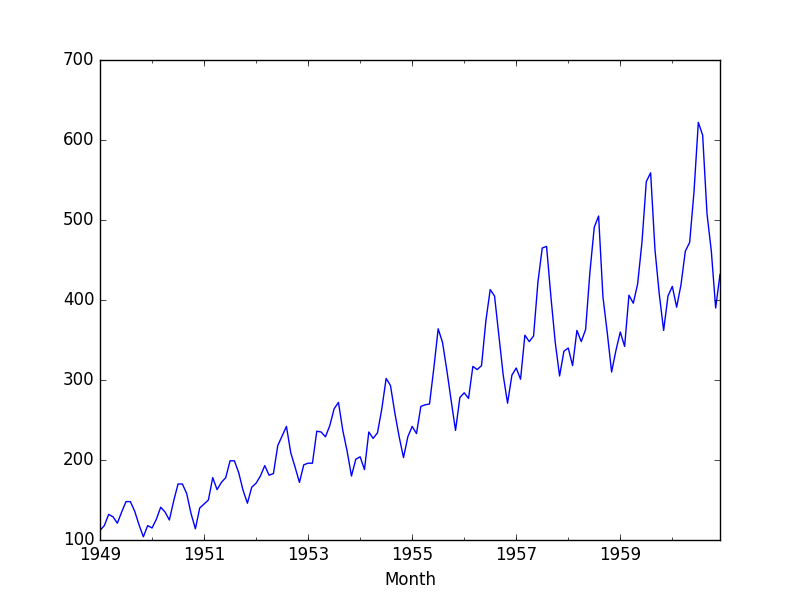



# Series Temporales
<div class="hr2"></div>

**¿Por qué es bueno que las series sean estacionarias?**

-   Con series estacionarias podemos obtener predicciones fácilmente.

-   Como la media es constante, podemos estimarla con todos los datos, y
    utilizar este valor para predecir una nueva observación.

-   También se pueden obtener intervalos de predicción (confianza) para
    las predicciones asumiendo que $X_t$ sigue una distribución conocida,
    por ejemplo, normal.

## Series temporales: Componentes
<div class="hr2"></div>

### Componentes de una serie temporal


- En muchos casos, se supone que la serie temporal es la suma de varias
componentes:

$$Y_t=T_t+S_t+E_t$$

**Valor observado = Tendencia + Estacionalidad + Irregular**

- **Tendencia:** comportamiento o movimiento suave de la serie a largo plazo. Puede ser creciente o decreciente y no tiene por que ser lineal. A veces incluye el ciclo (tendencia_ciclo).



- **Estacionalidad:** movimientos de oscilación dentro del año (trimestral, mensual, diario). La estacionalidad siempre es de un periodo fijo y conocido. No confundir con los ciclos que no tienen duración fija y como mínimo son de dos años.

- **Irregular:** variaciones aleatorias alrededor de los componentes anteriores.



## Componentes

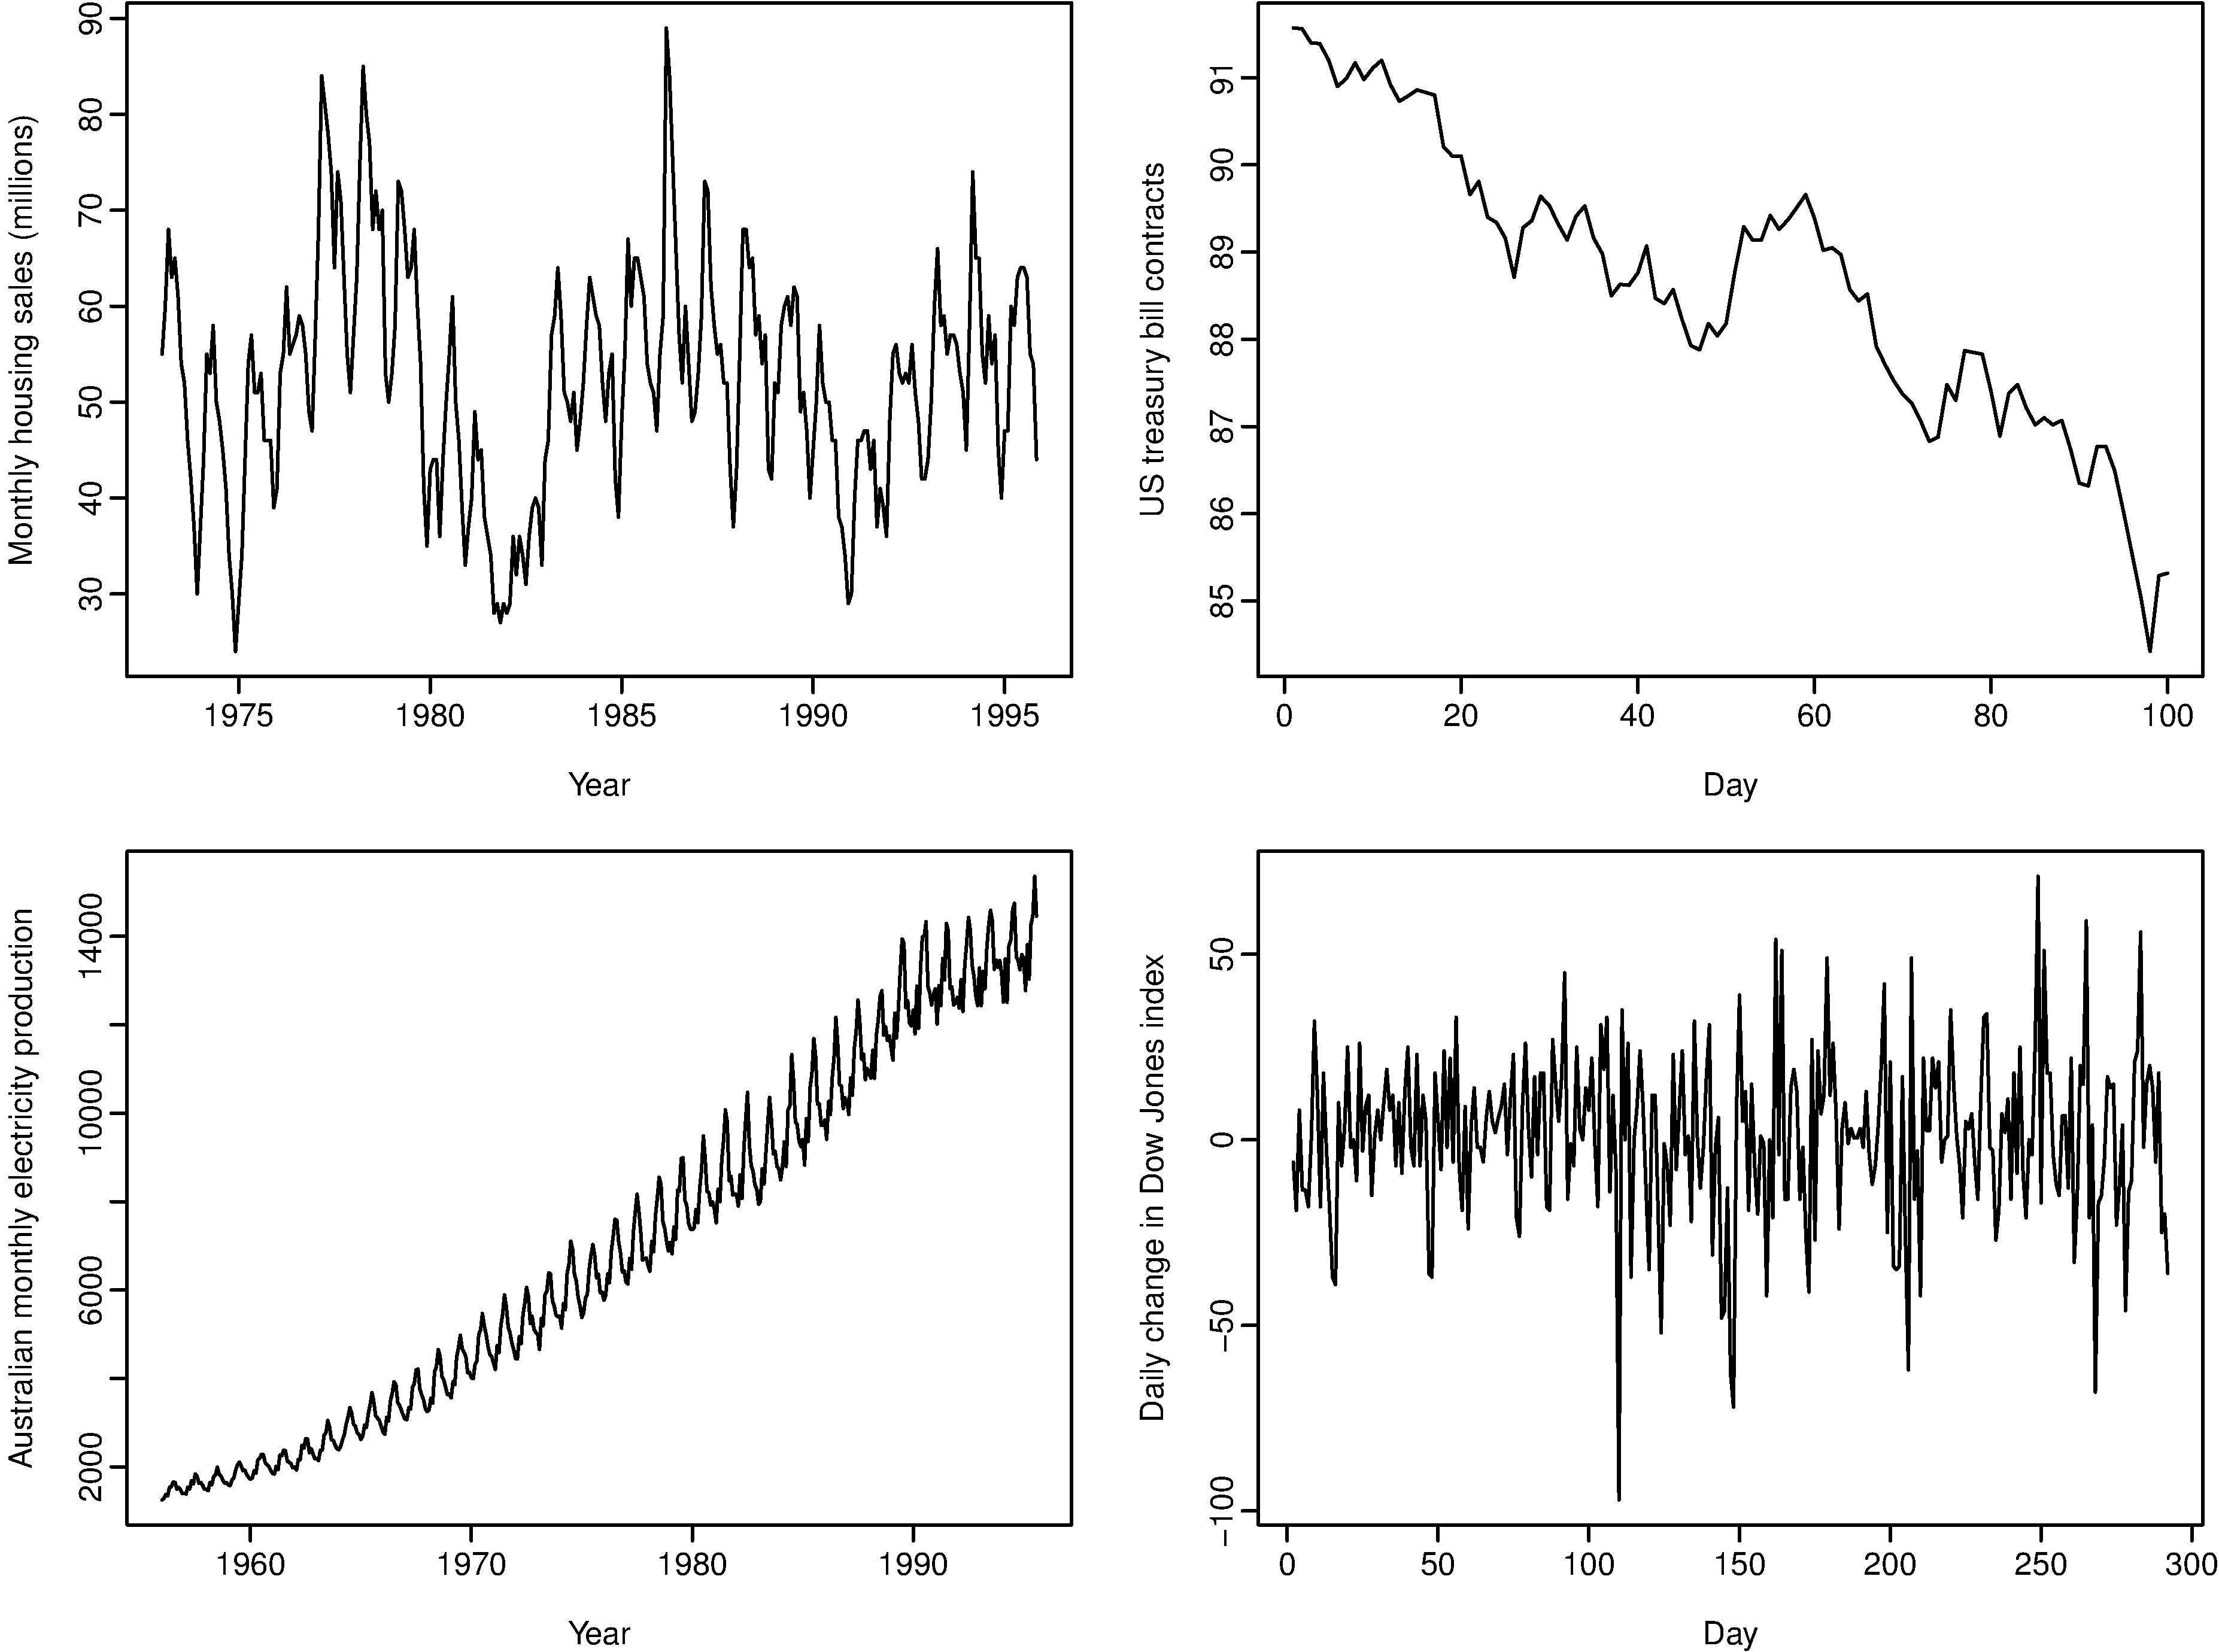




<div class="hr2"></div>

-  Las ventas de casas muestra un componente estacional y uno cíclico.
    No parece que exista tendencia.

-  Los t-bill no son estacionales pero tiene tendencia decreciente.

- La producción de electricidad tiene una fuerte tendencia y una
    fuerte estacionalidad.

- Los rendimientos del Dow Jones no tiene ni tendencia ni componentes
    estacional.


**Modelo Multiplicativo**
<div class="hr2"></div>

- El modelo también se puede expresar en forma multiplicativa cuando las
variaciones alrededor de la tendencia son proporcionales al
nivel de la serie temporal.

- Para ello se debe realizar una transformación logarítmica para que la
variación de la serie sea estable:
$$Y_t=T_t \times S_t \times E_t$$
$$lnY_t=lnT_t+lnS_t+lnE_t$$

# Ejemplo Descomposición:

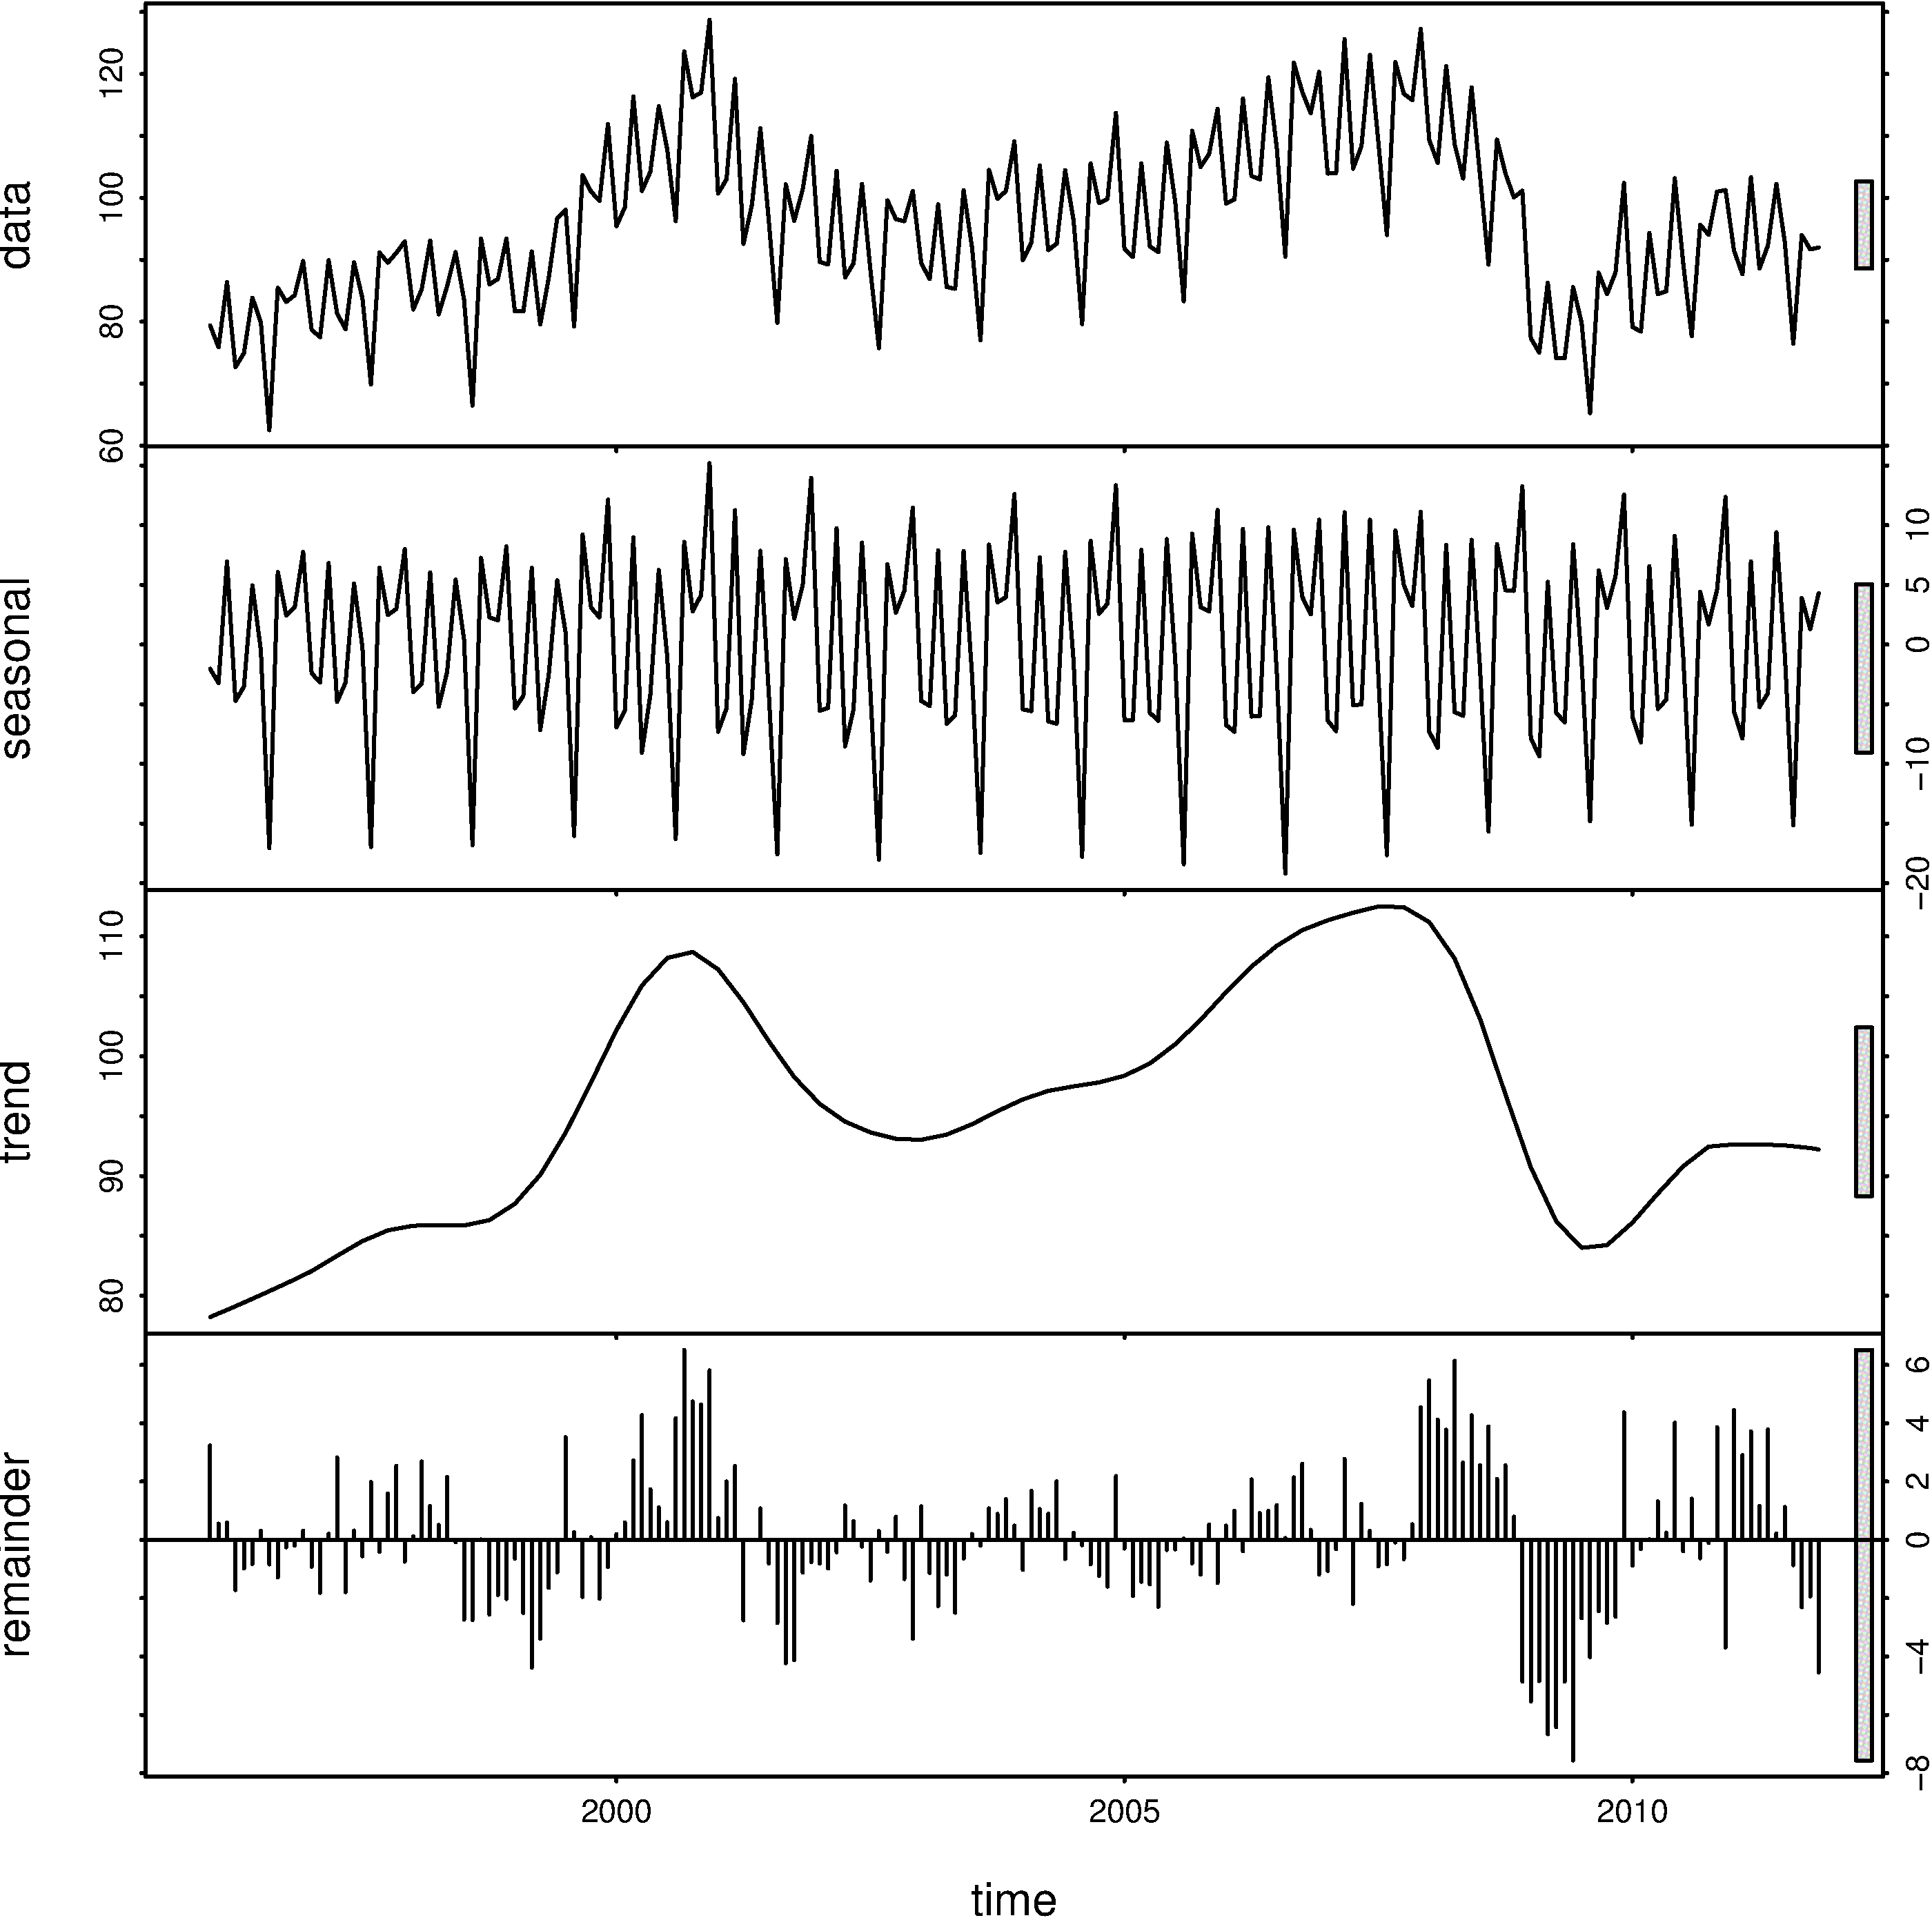


# Suavizado Exponencial


### Modelos de Suavizado Exponencial


-   Se emplean fundamentalmente para predecir nuevos valores de la
    serie.

-   Se basan en modelos paramétricos deterministas que se ajustan a la
    evolución de la serie.

-   Las observaciones más recientes tienen más peso en la predicción que
    las más alejadas.

-   Se resuelven por métodos recursivos.


# Modelos ETS 
<div class="hr2"></div>
$$Y_t=T_t+S_t+E_t \ \ \ \rightarrow \ \ \ \text{Modelo Aditivo}$$
$$Y_t=T_t \times S_t \times E_t \ \ \ \rightarrow \ \ \ \text{Modelo Multiplicativo}$$


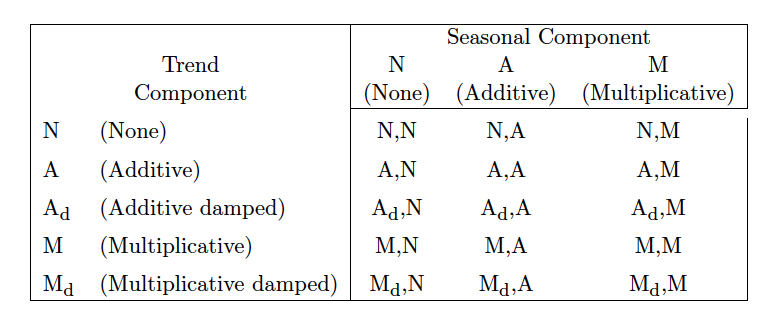



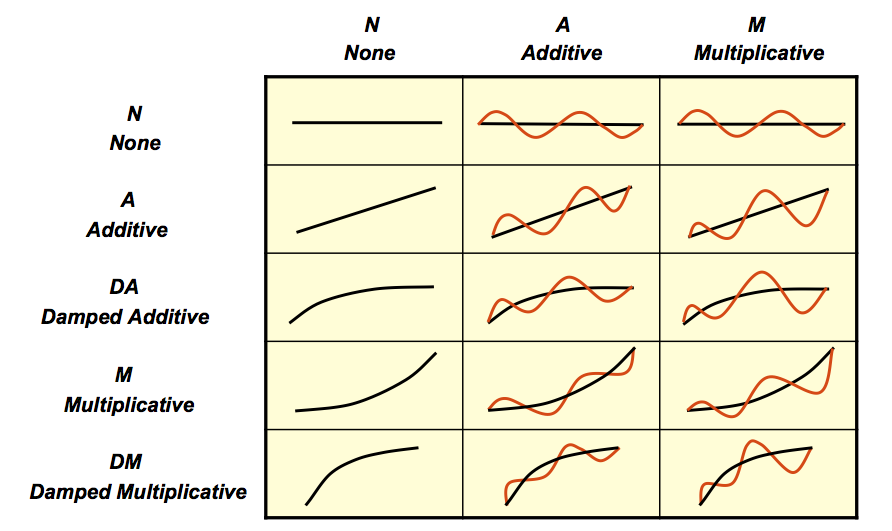



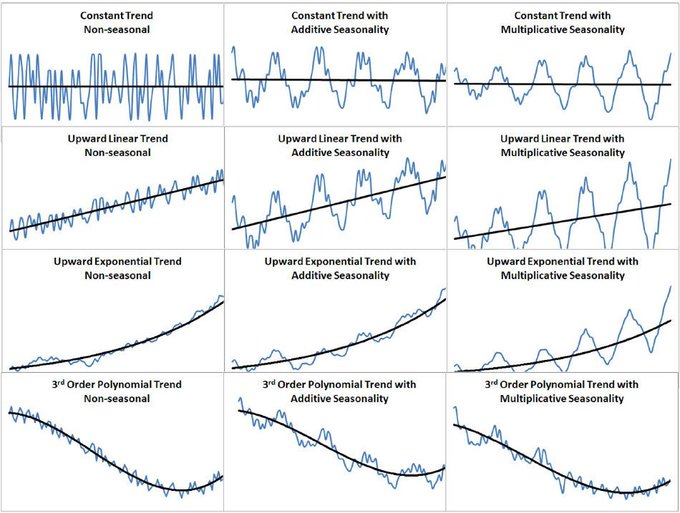



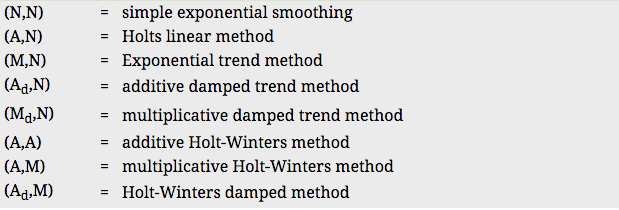


# Selección de Modelos
<div class="hr1"></div>

**¿Cómo seleccionar un modelo de entre varios candidatos?**


- Utilizando los **Criterios de Información (IC)**:

    - Cuantifican la información residual. Cuanto más información tienen los residuos del modelo mayor es el IC, por lo tanto peor es el modelo.

    - Suponemos que tenemos k modelos alternativos, $M_1, M_2, \cdots,M_j,\cdots,M_k$, Se elige el $j$ que **minimice**:
     
     $$IC(j)=ln\hat \sigma_j^2+\frac{C(T)}{T}$$

    donde $\hat \sigma_j^2$ es la varianza residual del modelo, $T$ es el tamaño muestral y $C(T)$ es el término de penalización (penalty).

    - AIC (Akaike Information Criterium): $C(T)=2$

    - BIC (Bayesian Information Criterium): $C(T)=lnT$

    - HQ (Hannan-Quin Information Criterium): $C(T)=2\cdot ln(lnT)$



# Precisión de las Predicciones
<div class="hr1"></div>

### Precisión de las Predicciones


- Error de predicción:

$$e_t=y_t-\hat y_t \ \ \ t=1 \cdots h$$


- Medidas Absolutas (dependen de las unidades de medida):  
    - Mean absolute error (MAE) = $\sum \frac{|e_t|}{h}$  
    - Mean squared error (MSE) = $\sum \frac{e_t^2}{h}$  
    - Root mean squared error (RMSE) = $\sqrt {MSE}$  


# Precisión de las Predicciones

- Medidas Relativas (expresadas en %, y no dependen de las unidades de medida)

    - Porcentaje de error: $p_t=100\frac{e_t}{y_t}$

    - Mean absolute percentage error (MAPE) = $\sum \frac{|p_t|}{h}$


# Precisión de las Predicciones

- Medidas Escaladas (se escalan los errores con respecto al modelo naïve) 

    - Modelo naïve: $\hat y_t=y_{t-1}$  

    - Error modelo naïve: $n_t=y_t-y_{t-1}$  

    - Scaled error: $q_t=\frac{e_t}{\sum \frac{|n_t|}{h}}$  

    - Mean absolute scaled error (MASE): $\sum \frac{|q_t|}{h}$




# CP 01: Predicción Ingresos Coca-Cola (KO)
<div class="hr1"></div>


# Introducción

<div class="exercise">

- El objetivo es predecir las ventas de Coca-Cola.

- Se realizan diferentes predicciones de las ventas de Coca-Cola.

- Se tienen datos trimestrales desde 1991-1T hasta 2021-2T. 

- Se dejan fuera de la estimación los ocho últimos trimestres para seleccionar el mejor modelo.

- Se prueban todos los modelos de suavizados exponencial. 

</div>


In [ ]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Read Data
ko_df = pd.read_csv('ko_22T2.csv',sep=';')
ko_df['Fecha'] = pd.to_datetime(ko_df['Fecha'],format="%Y%m%d")
ko_df = ko_df.set_index('Fecha')
ko_df.head()



,Ingresos
Fecha,
2022-06-03,11325
2022-03-03,10491
2021-12-31,9464
2021-09-26,10042
2021-06-03,10129


<div class="redcuadro">

Convertimos los datos en trimestrales

</div>

In [4]:
ko_ts=ko_df.resample("q").last()
#ko_ts=ko_df['Ingresos'].astype('float64').to_period('Q')
ko_ts.tail()

,Ingresos
Fecha,
2021-06-30,10129
2021-09-30,10042
2021-12-31,9464
2022-03-31,10491
2022-06-30,11325


# Solución

## Graficar los Ingresos
<div class="hr2"> </div>
- Tendencia
- Componente Estacional
- Varianza no constante

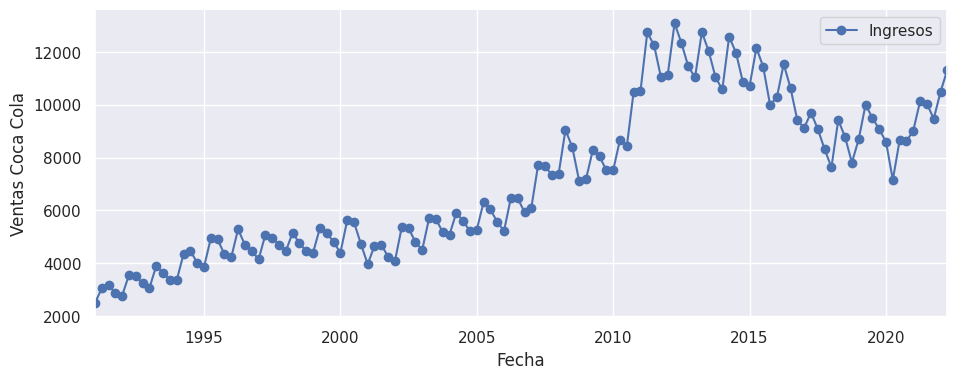

In [5]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = ko_ts.plot(marker='o', linestyle='-')
ax.set_ylabel('Ventas Coca Cola');


<div class="redcuadro">

Analizamos la estacinalidad

</div>

- Componente estacional
- Las Ventas dependen del trimestre
- Más ventas en el 2T y en el 3T
- El Componente estacional no es estacionario

In [6]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Comportamiento Estacional')

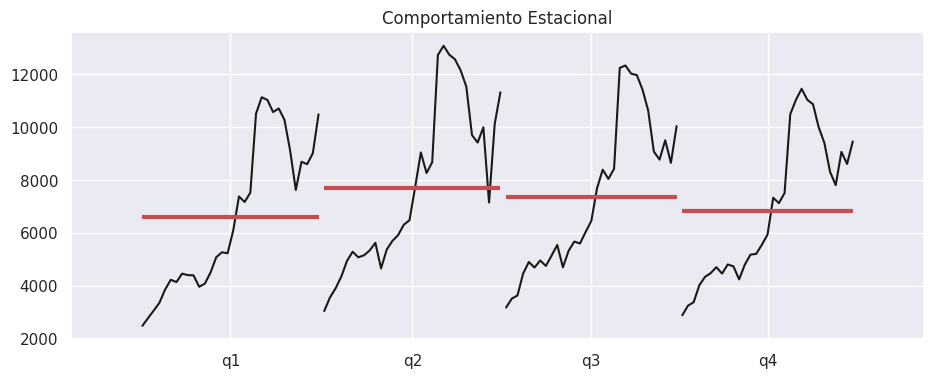

In [7]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(ko_ts['Ingresos'],ax=ax)
ax.set_title('Comportamiento Estacional')

# Modelos de Suavizado Exponencial

<div class="redcuadro">

Vamos a separar la muestra en la parte de estimación (Training) y la parte de predicción/Verificación (Testing). Quitamos 4 trimestres. <br><br>

Vamos a predecir 4 periodos (un año) (h=4)<br><br>

</div>

In [8]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split


In [9]:
 ko_ts['Ingresos'].astype('float64').to_period('Q')

Fecha
1991Q1     2480.0
1991Q2     3039.0
1991Q3     3172.0
1991Q4     2879.0
1992Q1     2772.0
           ...   
2021Q2    10129.0
2021Q3    10042.0
2021Q4     9464.0
2022Q1    10491.0
2022Q2    11325.0
Freq: Q-DEC, Name: Ingresos, Length: 126, dtype: float64

122 4


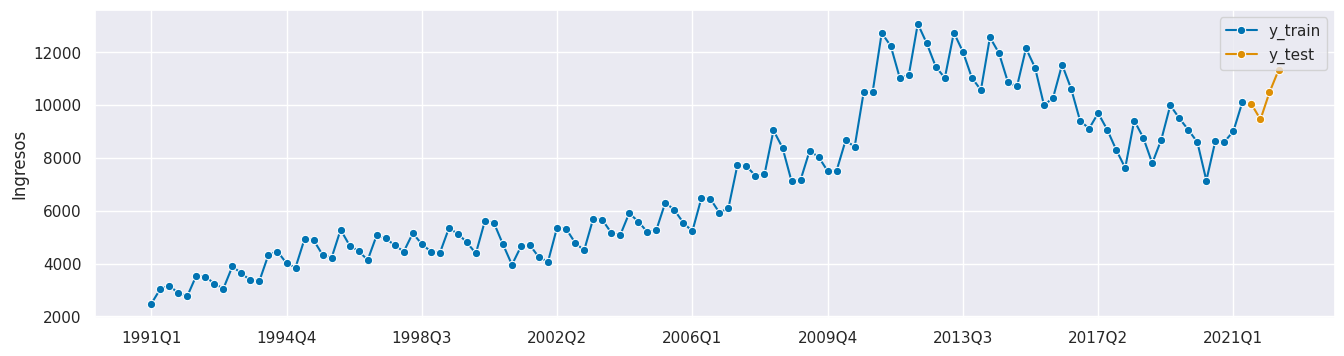

In [11]:

y_train, y_test = temporal_train_test_split(y = ko_ts['Ingresos'].astype('float64').to_period('Q'), test_size=4)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

<div class="redcuadro">

Se observa la necesidad de incluir componente estacional. <br><br>

</div>

In [12]:
from sktime.forecasting.ets import AutoETS

In [13]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 17)

# step 3: specifying the forecasting algorithm
ko_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)


In [14]:
ko_auto_model.fit(y_train)



AutoETS(auto=True, n_jobs=-1, sp=4)

In [15]:
print(ko_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  122
Model:                       ETS(MAM)   Log Likelihood                -905.927
Date:                Mon, 25 Sep 2023   AIC                           1831.853
Time:                        05:56:07   BIC                           1859.893
Sample:                    03-31-1991   HQIC                          1843.242
                         - 06-30-2021   Scale                            0.004
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8438      0.087      9.652      0.000       0.672       1.015
smoothing_trend     8.438e-05        nan        nan        nan         nan         nan
smoothing_seasonal  

In [16]:

# step 5: querying predictions
ko_pred = ko_auto_model.predict(fh)
print(ko_pred)

2021Q3    10282.769738
2021Q4     9506.523609
2022Q1     9401.106815
2022Q2    10361.900677
2022Q3    10527.174373
2022Q4     9731.143430
2023Q1     9621.931442
2023Q2    10603.872665
2023Q3    10771.579008
2023Q4     9955.763251
2024Q1     9842.756069
2024Q2    10845.844654
2024Q3    11015.983642
2024Q4    10180.383072
2025Q1    10063.580697
2025Q2    11087.816643
Freq: Q-DEC, Name: Ingresos, dtype: float64


In [17]:
ko_pred_ints = ko_auto_model.predict_interval(fh, coverage=0.9)
ko_pred_ints

Coverage              
                0.9              
              lower         upper
2021Q3  9244.169222  11354.191939
2021Q4  8259.747319  10751.367337
2022Q1  7868.193456  10910.983380
2022Q2  8476.615433  12315.438483
2022Q3  8435.943778  12784.880350
2022Q4  7634.078181  12005.200084
2023Q1  7463.714602  12042.593628
2023Q2  8048.931565  13346.109774
2023Q3  7937.220247  13724.822480
2023Q4  7339.588695  12955.973074
2024Q1  7224.336752  12968.180500
2024Q2  7782.903391  14287.193756
2024Q3  7850.557676  14848.888818
2024Q4  7079.235752  14049.626609
2025Q1  7014.590850  13912.077202
2025Q2  7567.873796  15382.897876

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

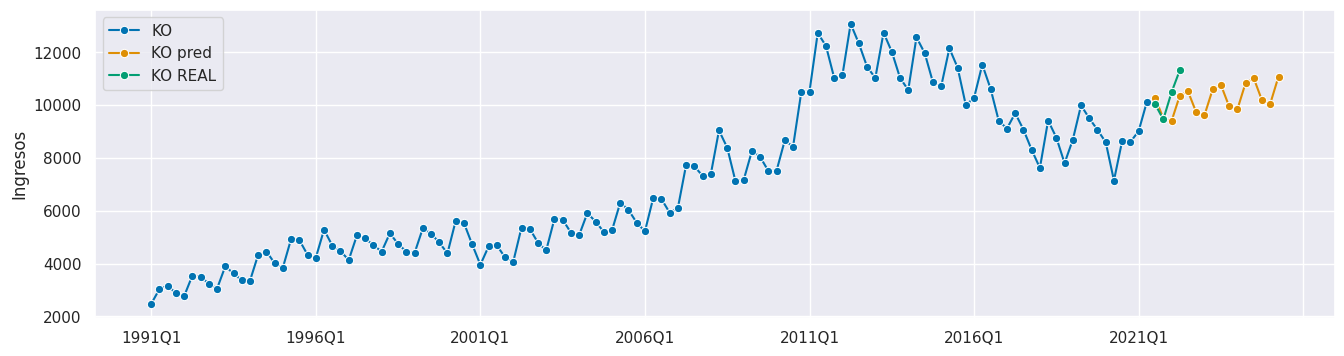

In [18]:

# optional: plotting predictions and past data
plot_series(y_train, ko_pred,y_test, labels=["KO", "KO pred", "KO REAL"])

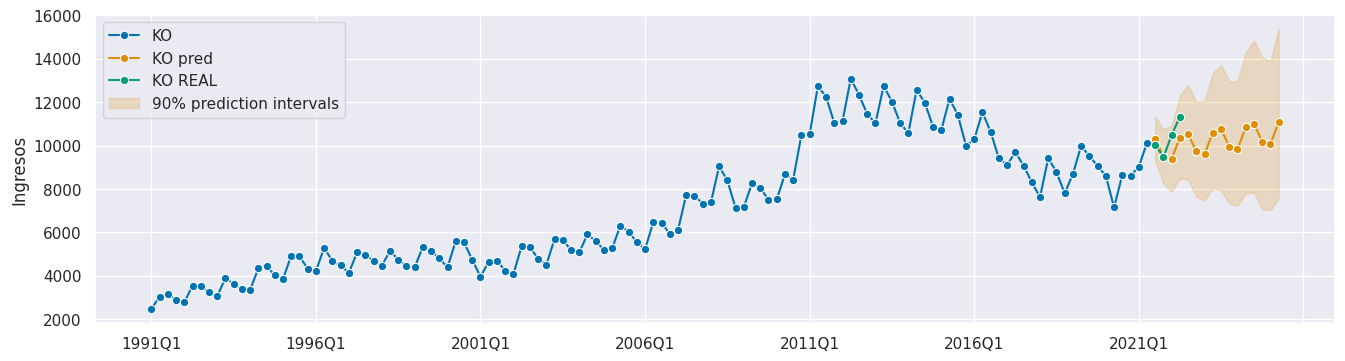

In [19]:
fig, ax = plot_series(y_train, ko_pred, y_test, labels=["KO", "KO pred", "KO REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    ko_pred_ints[('Coverage', 0.9, 'lower')],
    ko_pred_ints[('Coverage', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"90% prediction intervals",
)
ax.legend(loc='upper left')


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

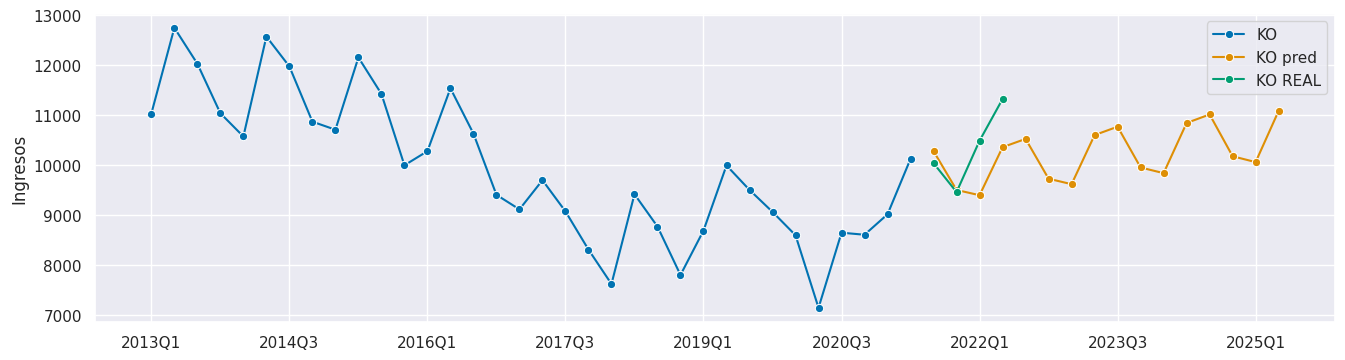

In [20]:
plot_series(y_train["2013":], ko_pred,y_test, labels=["KO", "KO pred", "KO REAL"])

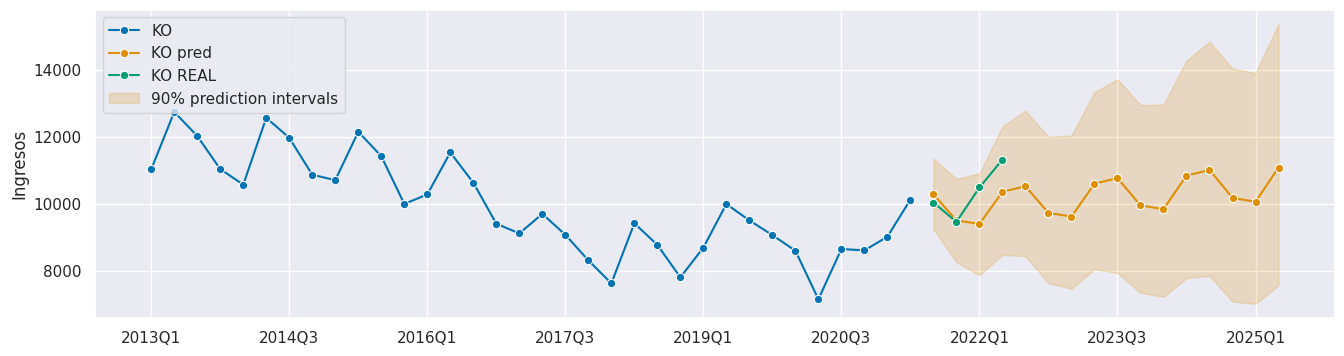

In [21]:
fig, ax = plot_series(y_train["2013":], ko_pred, y_test, labels=["KO", "KO pred", "KO REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    ko_pred_ints[('Coverage', 0.9, 'lower')],
    ko_pred_ints[('Coverage', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"90% prediction intervals",
)
ax.legend(loc='upper left');

<div class="redcuadro">

Comprobemos la precisión de las predicciones <br><br>

</div>

In [23]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, ko_pred[0:4])

0.05434993766925425

In [24]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, ko_pred[0:4])

543801.4465613457

In [25]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, ko_pred[0:4])

737.4289433981729

<div class="redcuadro">

Prediccion para final de año 2022 y 2023 <br><br>

</div>

In [26]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 7)

# step 3: specifying the forecasting algorithm
ko_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

y = ko_ts['Ingresos'].astype('float64').to_period('Q')

ko_auto_model.fit(y)

print(ko_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  126
Model:                       ETS(MAM)   Log Likelihood                -937.651
Date:                Mon, 25 Sep 2023   AIC                           1895.303
Time:                        05:57:49   BIC                           1923.666
Sample:                    03-31-1991   HQIC                          1906.826
                         - 06-30-2022   Scale                            0.004
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8460      0.089      9.556      0.000       0.673       1.020
smoothing_trend      8.46e-05        nan        nan        nan         nan         nan
smoothing_seasonal  

In [27]:
# step 5: querying predictions
ko_pred = ko_auto_model.predict(fh)
print(ko_pred)

2022Q3    11513.601060
2022Q4    10702.923355
2023Q1    10732.075427
2023Q2    11650.767764
2023Q3    11841.382674
2023Q4    11005.472399
Freq: Q-DEC, Name: Ingresos, dtype: float64


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

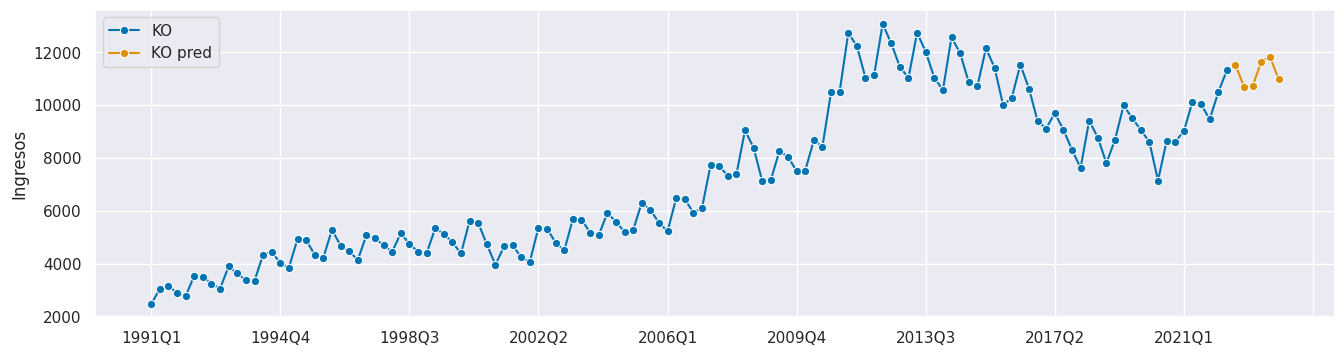

In [28]:
plot_series(y, ko_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual<br><br>

</div>

In [29]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='additive', seasonal='multiplicative', sp=4)
forecaster.fit(y)


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='additive')

In [30]:

y_pred = forecaster.predict(fh)
y_pred

2022Q3    11454.473349
2022Q4    10620.961572
2023Q1    10693.930354
2023Q2    11652.240708
2023Q3    11766.927833
2023Q4    10908.717223
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [31]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Ingresos   No. Observations:                  126
Model:             ExponentialSmoothing   SSE                       31055874.287
Optimized:                         True   AIC                           1580.292
Trend:                         Additive   BIC                           1602.982
Seasonal:                Multiplicative   AICC                          1582.205
Seasonal Periods:                     4   Date:                 Mon, 25 Sep 2023
Box-Cox:                          False   Time:                         05:58:26
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8535714                alpha                 True
smoothing_trend          

In [32]:
forecaster.get_fitted_params()

{'initial_level': 2902.608315907977,
 'initial_slope': None,
 'initial_seasons': array([0.91257016, 1.11733082, 1.09200085, 1.00178914]),
 'aic': 1580.2920953139417,
 'bic': 1602.9823505695535,
 'aicc': 1582.2051387922024}

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

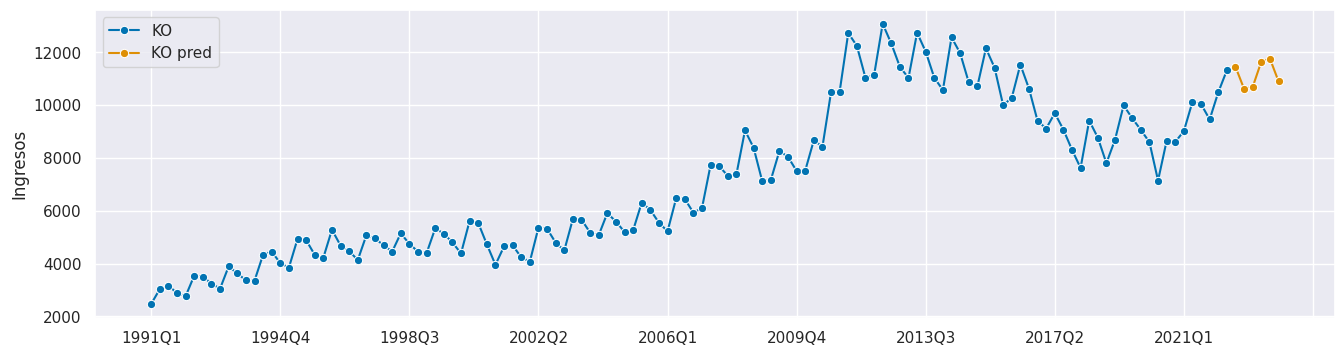

In [33]:
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin componente estacional<br><br>

</div>

In [34]:
forecaster = ExponentialSmoothing(trend='additive',seasonal=None, sp=4)
forecaster.fit(y)

ExponentialSmoothing(sp=4, trend='additive')

In [35]:
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

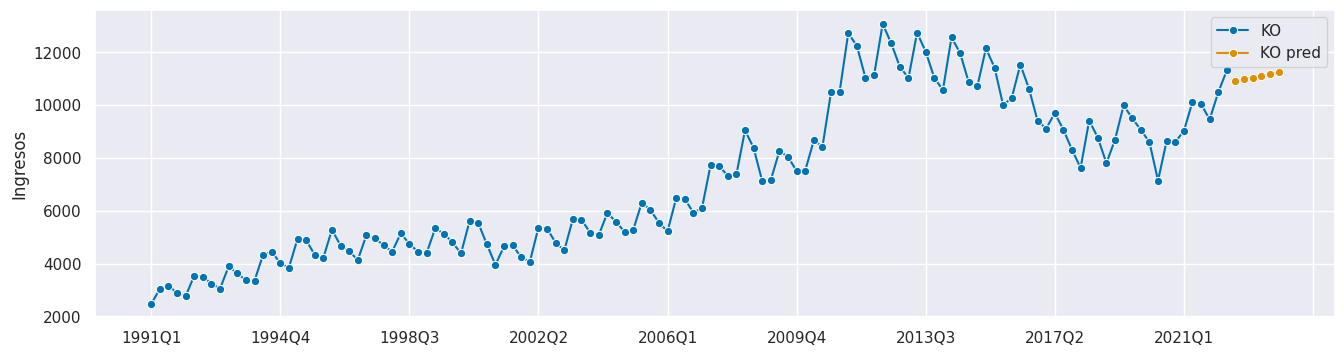

In [36]:
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin componente estacional y tendencia multiplicativa<br><br>

</div>

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

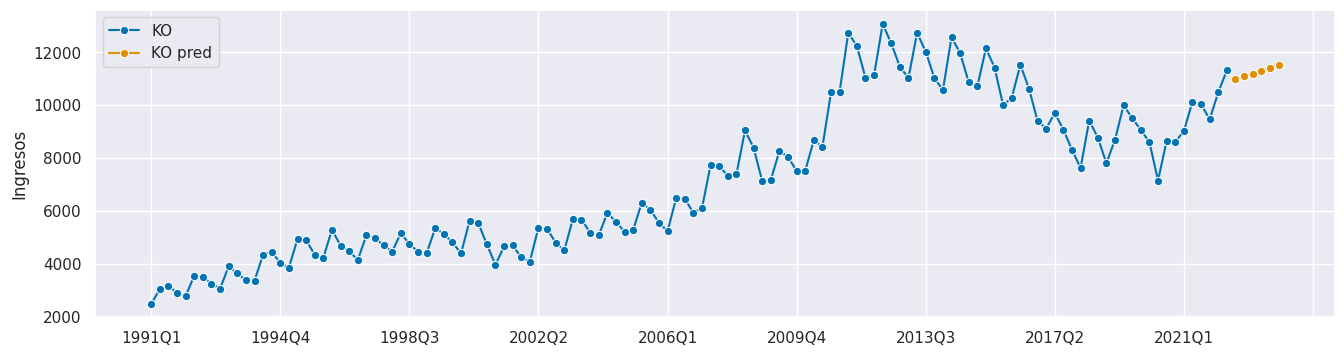

In [37]:
forecaster = ExponentialSmoothing(trend='mul',seasonal=None, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin componente estacional y sin tendencia<br><br>

</div>

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

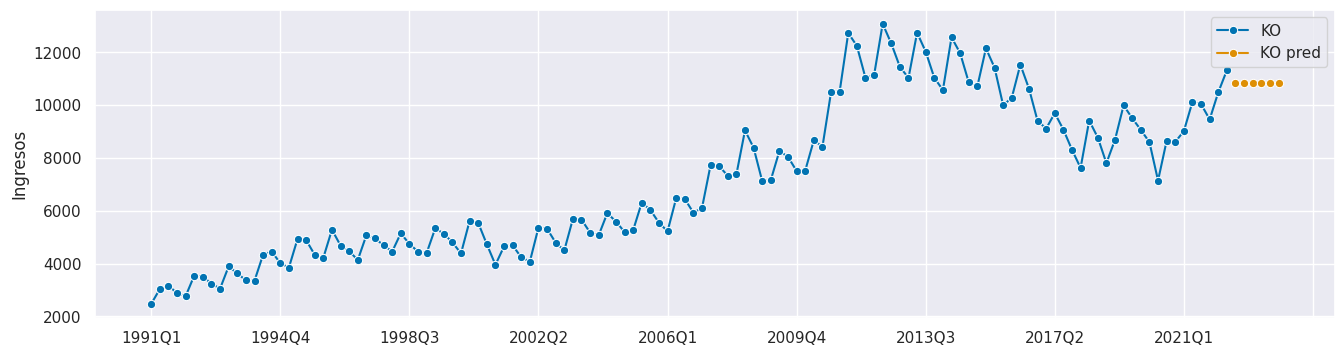

In [38]:
forecaster = ExponentialSmoothing(trend=None,seasonal=None, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin tendencia

    Componente estacional multiplicativo


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

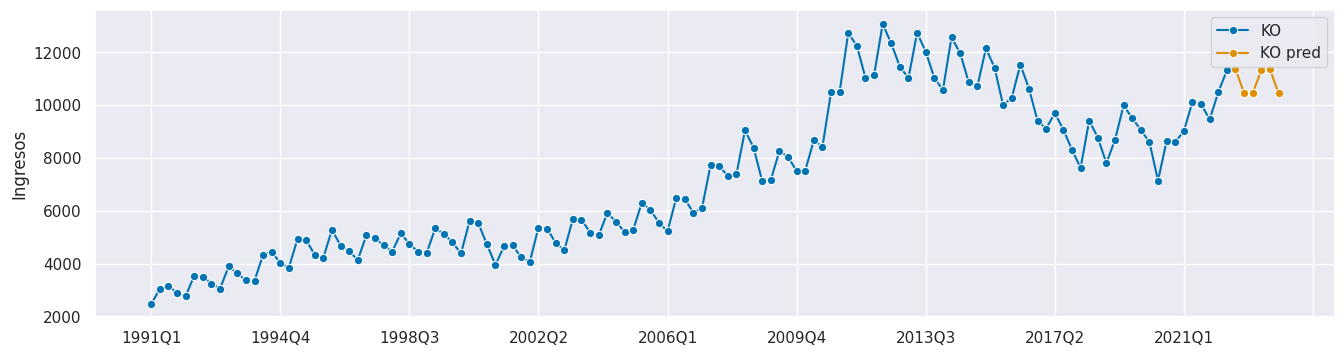

In [39]:
forecaster = ExponentialSmoothing(trend=None,seasonal="mul", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin tendencia<br>

Componente estacional aditivo<br><br>

</div>

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

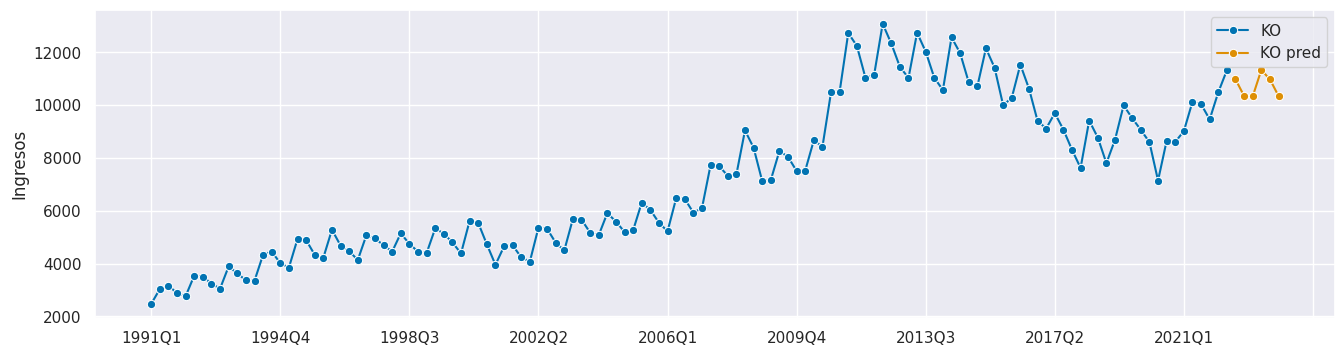

In [40]:
forecaster = ExponentialSmoothing(trend=None,seasonal="add", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Comparar modelo con tendencia aditiva con y sin dumped<br>

Componente estacional aditivo<br><br>

</div>

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Ingresos'>)

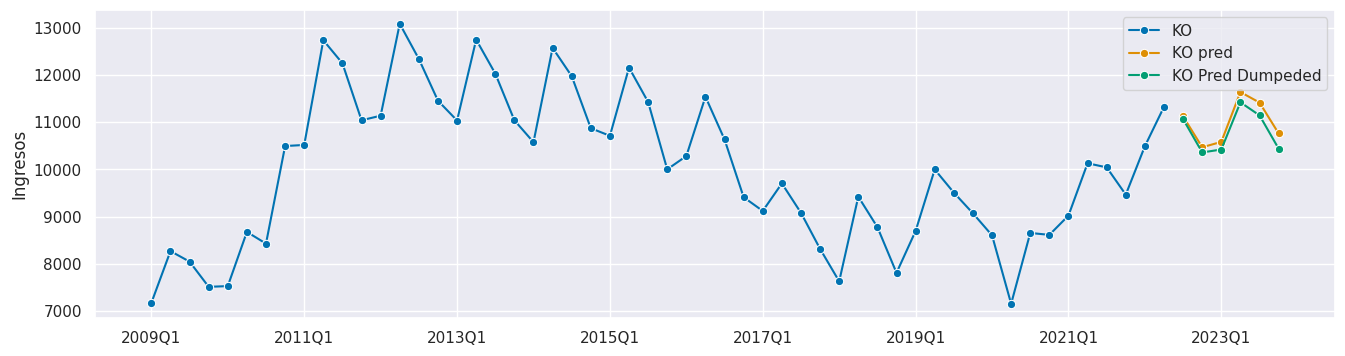

In [41]:
forecaster = ExponentialSmoothing(trend="add",seasonal="add",damped_trend=False, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)

forecaster = ExponentialSmoothing(trend="add",seasonal="add",damped_trend=True, sp=4)
forecaster.fit(y)
y_pred_dump = forecaster.predict(fh)
plot_series(y["2009":], y_pred, y_pred_dump,labels=["KO", "KO pred","KO Pred Dumpeded"])